In [ ]:
!pip install streamlit
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.38s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
%%writefile app.py
with open('key.txt','r') as f:
  key = f.read()
import streamlit as st
from bs4 import BeautifulSoup
import requests
headers = {
            "Host": "www.amazon.in",
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
            'Accept-Language': 'en-US,en;q=0.5',
            'Accept-Encoding': 'gzip, deflate, br',
            'DNT': '1',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1',
            'Sec-Fetch-Dest': 'document',
            'Sec-Fetch-Mode': 'navigate',
            'Sec-Fetch-Site': 'none',
            'Sec-Fetch-User': '?1',
            'Pragma': 'no-cache',
            'Cache-Control': 'no-cache',
}
response = requests.get("https://www.amazon.in", headers=headers)
cookies = response.cookies
if (response.status_code)!=200:
 exit()
st.title("Amazon chat Bot")

# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []

# Display chat messages from history on app rerun
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])
# React to user input
if prompt := st.chat_input("Enter the product url: "):
    st.chat_message("user").markdown(prompt)
    # Add user message to chat history
    st.session_state.messages.append({"role": "user", "content": prompt})
    question = prompt.find('question')
    link = prompt.find('/ref=')
    if question!=-1:
      page = requests.get(prompt, headers=headers, cookies = cookies)
      soup = BeautifulSoup(page.text, 'html.parser')
      description = soup.find(class_="a-row feature")
      about = soup.find(class_="a-section a-spacing-medium a-spacing-top-small")
      specifications = soup.find(class_="a-expander-content a-expander-section-content a-section-expander-inner")
      API_URL = "https://api-inference.huggingface.co/models/deepset/deberta-v3-base-squad2"
      headers = {"Authorization": f"Bearer {key}"}
      payload = {
        "inputs": {
          "question": prompt[10:],
          "context": str(about.text + description.text + specifications.text)
        },
      }
      output = requests.post(API_URL, headers=headers, json=payload)
      response = f"Echo: {output['answer'].strip()}"
      # Display assistant response in chat message container
      with st.chat_message("assistant"):
          st.markdown(response)
      # Add assistant response to chat history
      st.session_state.messages.append({"role": "assistant", "content": response})


    if link!=-1:
      prompt = prompt[:link]
      page = requests.get(prompt, headers=headers, cookies = cookies)
      soup = BeautifulSoup(page.text, 'html.parser')
      name = soup.find_all('title')
      rating = soup.find_all(class_="a-fixed-left-grid-col aok-align-center a-col-right")
      response = f"Echo: {name[0].text} with rating {rating[0].text}"
      # Display assistant response in chat message container
      with st.chat_message("assistant"):
          st.markdown(response)
      # Add assistant response to chat history
      st.session_state.messages.append({"role": "assistant", "content": response})
    if question==-1 and link==-1:
      with st.chat_message("assistant"):
          st.markdown("Please Enter Valid link !!")
      # Add assistant response to chat history
      st.session_state.messages.append({"role": "assistant", "content": "Please Enter Valid link !!"})

Overwriting app.py


In [ ]:
! curl ipv4.icanhazip.com & streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501

34.85.216.33
npx: installed 22 in 1.918s
your url is: https://clever-nights-peel.loca.lt
^C


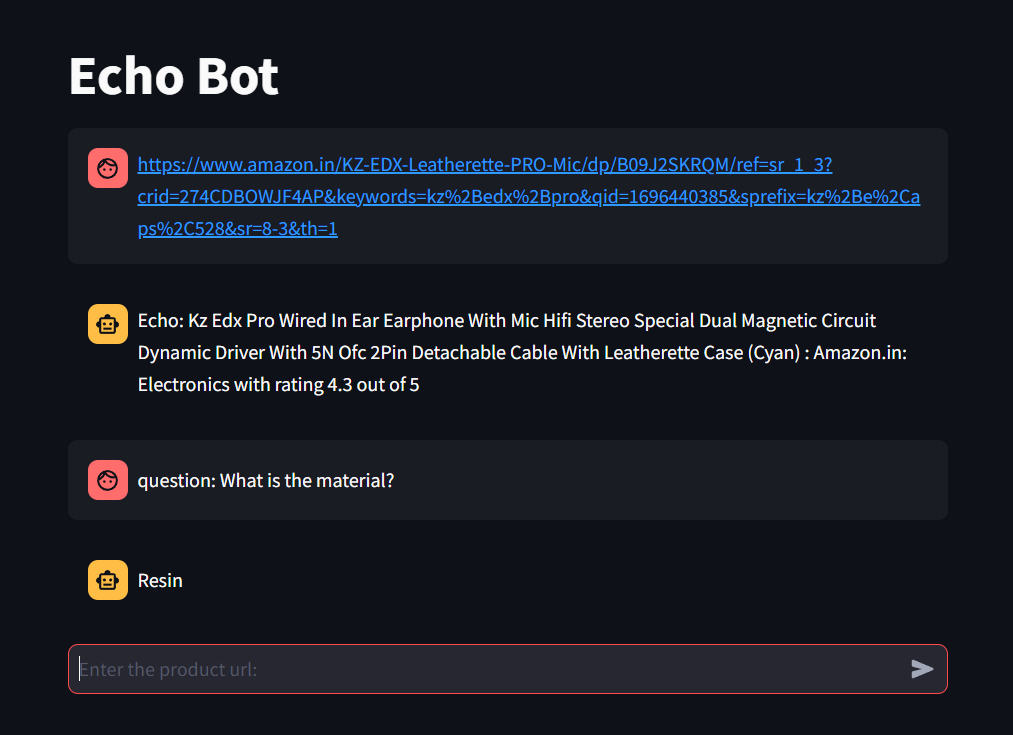